#K-Means Image Clustering on MNIST (Unsupervised Learning)
Author: Gorachand Mondal  
GitHub: https://github.com/Gorachand2501/kmeans-image-clustering

In [1]:
# Imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the MNIST Dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize pixels
y = mnist.target.astype(int)

print("Dataset shape:", X.shape)

Loading MNIST dataset...
Dataset shape: (70000, 784)


In [3]:
# Apply K-Means Clustering
print("Running K-Means clustering...")
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_
print("K-Means clustering completed.")

Running K-Means clustering...
K-Means clustering completed.


Reducing dimensions with PCA...


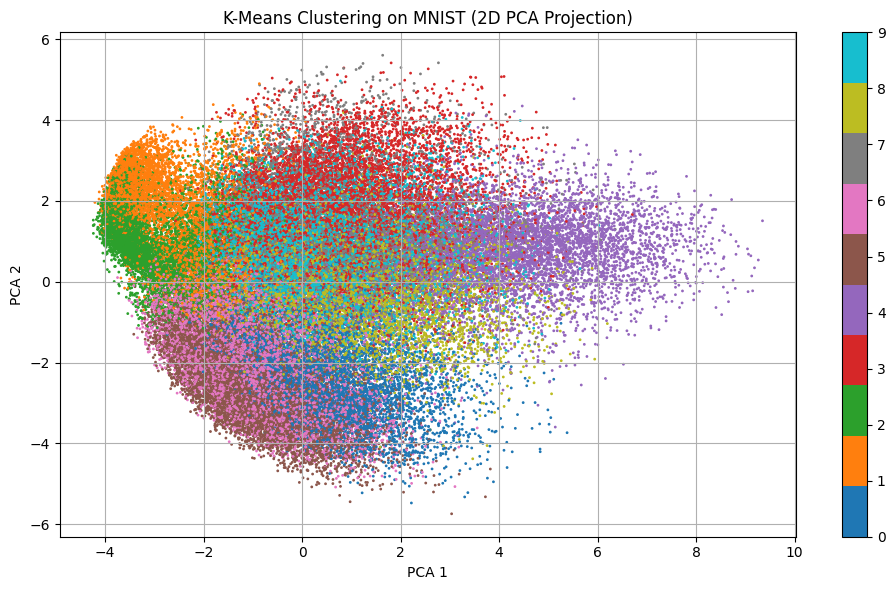

In [4]:
# PCA for Visualization (2D Plot)
print("Reducing dimensions with PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=1)
plt.title("K-Means Clustering on MNIST (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Compare Clusters to True Labels
def infer_cluster_labels(true_labels, cluster_labels):
    inferred_labels = {}
    for i in np.unique(cluster_labels):
        mask = cluster_labels == i
        true = y[mask]
        if len(true) == 0:
            continue
        inferred_label = np.bincount(true).argmax()
        inferred_labels[i] = inferred_label
    return inferred_labels

def transform_labels(inferred_labels, cluster_labels):
    return [inferred_labels[label] for label in cluster_labels]

inferred_labels = infer_cluster_labels(y, clusters)
predicted_labels = transform_labels(inferred_labels, clusters)

accuracy = np.mean(predicted_labels == y)
print(f"\n✅ Clustering Accuracy (unsupervised): {accuracy * 100:.2f}%")


✅ Clustering Accuracy (unsupervised): 58.15%


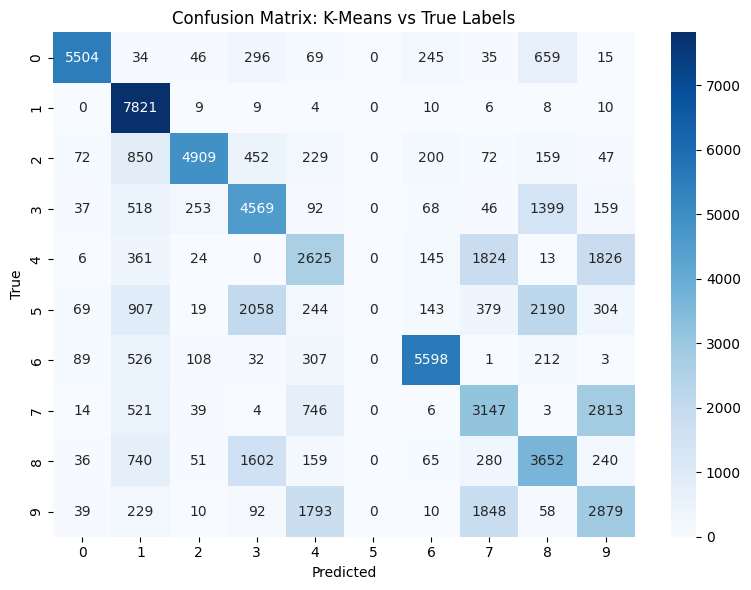

In [6]:
# Confusion Matrix
cm = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: K-Means vs True Labels")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()